**Import Libraries**

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [429]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load and Inspect the Data**

In [430]:
pcos = pd.read_csv(r'/content/drive/MyDrive/projects-sem6/PCOS_data.csv')
pcos.head()
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**Two columns are of object(string) type, change it to numeric**

In [431]:
for i in ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)']:
    pcos[i] = pd.to_numeric(pcos[i], errors='coerce')

**Remove columns 'Sl. No', 'Patient File No.', 'Unnamed: 44' that do not have impact on the result.**


In [432]:
pcos = pcos.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis =1)
target = pcos.columns[:1].to_list()
features = pcos.columns[1:].to_list()
print("Total number of Features:", len(features))

Total number of Features: 41


Check for any missing Values or NaN values

In [433]:
pcos.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

Since the number of missing values is very low compared to the total record we can directly remove them.

In [434]:
pcos = pcos.dropna()
print("Total number of Features:", len(features))

Total number of Features: 41


**Chi Square Test**

Out of the 41 features, all the features might not influence the prediction. If we use all of them there could be a chance of overfitting. Thus we find a need for feature selection to identify top 30 parameters that influence our predition result. Hence we will use the Chi Square method to determine important features.

In [435]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num = 30

bestfeatures = SelectKBest(score_func=chi2, k=num)
fit = bestfeatures.fit(pcos[features], pcos[target])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pcos.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending = False)
featureScores = featureScores[featureScores.Feature != target[0]]
featureScores = featureScores.reset_index(drop = True)
featureScores[:num]

,Feature,Score
0,PRL(ng/mL),9600.594045
1,No. of abortions,6899.358709
2,FSH(mIU/mL),2572.753526
3,II beta-HCG(mIU/mL),1592.273459
4,I beta-HCG(mIU/mL),1012.628577
5,Follicle No. (L),673.143812
6,BP _Diastolic (mmHg),564.595226
7,TSH (mIU/L),221.815736
8,LH(mIU/mL),96.235867
9,hair growth(Y/N),85.664994


In [436]:
new_features = featureScores['Feature'].to_list()
new_features = new_features[:num]
new_features

['PRL(ng/mL)',
 'No. of abortions',
 'FSH(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 '  I   beta-HCG(mIU/mL)',
 'Follicle No. (L)',
 'BP _Diastolic (mmHg)',
 'TSH (mIU/L)',
 'LH(mIU/mL)',
 'hair growth(Y/N)',
 'Weight gain(Y/N)',
 'RBS(mg/dl)',
 ' Age (yrs)',
 'Pimples(Y/N)',
 'Hb(g/dl)',
 'Vit D3 (ng/mL)',
 'Hair loss(Y/N)',
 'Cycle length(days)',
 'Height(Cm) ',
 'Skin darkening (Y/N)',
 'Cycle(R/I)',
 'Follicle No. (R)',
 'FSH/LH',
 'Hip(inch)',
 'PRG(ng/mL)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Pregnant(Y/N)',
 'Fast food (Y/N)',
 'Blood Group']

**Data Transformation - Chi Square**

In [437]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, new_features)])

In [438]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

**Model Training - Chi Square**

In [439]:
train, test = train_test_split(pcos, test_size = 0.2)

observations = pd.DataFrame()
classifier = 'RandomForestClassifier'
model =  RandomForestClassifier(n_estimators=200, random_state=0)

cv = KFold(n_splits=5, random_state=0, shuffle=True)
pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
observations[classifier] = (cross_val_score(pipe, train[new_features], np.ravel(train[target]), scoring='accuracy', cv=cv))

**Evaluation - Chi Square**

In [440]:
mean = pd.DataFrame(observations.mean(), index= [classifier])
observations = pd.concat([observations,mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean Accuracy']
observations.T.sort_values(by=['Mean Accuracy'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Accuracy
RandomForestClassifier,0.906977,0.906977,0.895349,0.918605,0.894118,0.904405


In [441]:
from sklearn.metrics import confusion_matrix

ran_model = RandomForestClassifier(n_estimators=200, random_state=0)
ran_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', ran_model)])
ran_pipe.fit(train[new_features], np.ravel(train[target]))
pred = ran_pipe.predict(test[new_features])

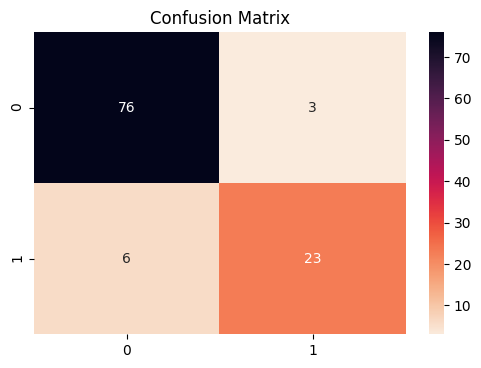

In [442]:
plt.figure(dpi = 100)
plt.title("Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(test[target]), pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

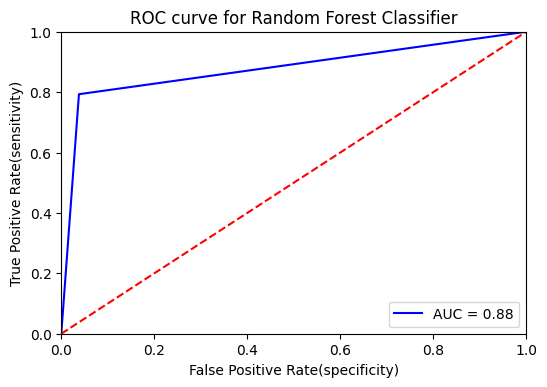

In [443]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

**Information Gain**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


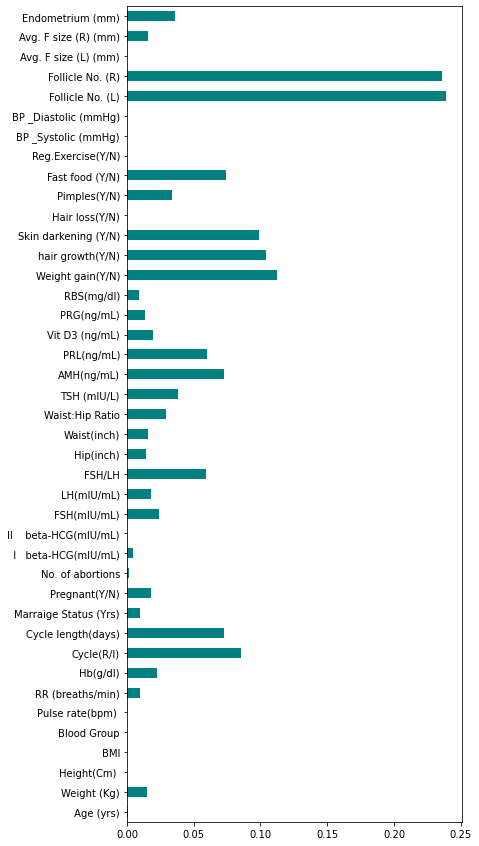

In [444]:
from sklearn.feature_selection import mutual_info_classif


f = plt.figure()
f.set_figheight(15)
importances = mutual_info_classif(pcos[features], pcos[target])
f_imp = pd.Series(importances, pcos.columns[1:])
f_imp.plot(kind='barh', color='teal')
plt.show()

In [445]:
info_gain = [(i*100, j) for i,j in zip(importances,features) ]
info_gain.sort(reverse=True)

ig_best = info_gain[:30]
ig_features = [i[1] for i in ig_best]

[(i[1],i[0]*100) for i in info_gain[:30]]

[('Follicle No. (L)', 2388.2734963873454),
 ('Follicle No. (R)', 2360.2083378574835),
 ('Weight gain(Y/N)', 1123.4623992530878),
 ('hair growth(Y/N)', 1039.2781251806116),
 ('Skin darkening (Y/N)', 985.7047468413139),
 ('Cycle(R/I)', 851.6989890839956),
 ('Fast food (Y/N)', 740.2837464150957),
 ('Cycle length(days)', 727.1429503175186),
 ('AMH(ng/mL)', 724.1161860613454),
 ('PRL(ng/mL)', 599.1218546511545),
 ('FSH/LH', 590.2322266980775),
 ('TSH (mIU/L)', 382.5981143528368),
 ('Endometrium (mm)', 363.2518611731039),
 ('Pimples(Y/N)', 339.6260232723391),
 ('Waist:Hip Ratio', 296.17511543999166),
 ('FSH(mIU/mL)', 243.20748252156577),
 ('Hb(g/dl)', 223.47097220715372),
 ('Vit D3 (ng/mL)', 194.2442031029712),
 ('Pregnant(Y/N)', 183.57554173901613),
 ('LH(mIU/mL)', 182.0858958844207),
 ('Avg. F size (R) (mm)', 160.47364968812872),
 ('Waist(inch)', 156.1787519994029),
 ('Weight (Kg)', 147.5294943082073),
 ('Hip(inch)', 140.10516792605011),
 ('PRG(ng/mL)', 132.45105331018746),
 ('Marraige Sta

**Data Transformation - IG**

In [446]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, ig_features)])

**Model Training - IG**

In [447]:
train, test = train_test_split(pcos, test_size = 0.2)

observations = pd.DataFrame()
classifier = 'RandomForestClassifier'
model =  RandomForestClassifier(n_estimators=200, random_state=0)

cv = KFold(n_splits=5, random_state=0, shuffle=True)
pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
observations[classifier] = (cross_val_score(pipe, train[ig_features], np.ravel(train[target]), scoring='accuracy', cv=cv))

**Evaluation - IG**

In [448]:
mean = pd.DataFrame(observations.mean(), index= [classifier])
observations = pd.concat([observations,mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean Accuracy']
observations.T.sort_values(by=['Mean Accuracy'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Accuracy
RandomForestClassifier,0.906977,0.918605,0.918605,0.860465,0.894118,0.899754


In [449]:
ran_model = RandomForestClassifier(n_estimators=200, random_state=0)
ran_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', ran_model)])
ran_pipe.fit(train[ig_features], np.ravel(train[target]))
pred = ran_pipe.predict(test[ig_features])

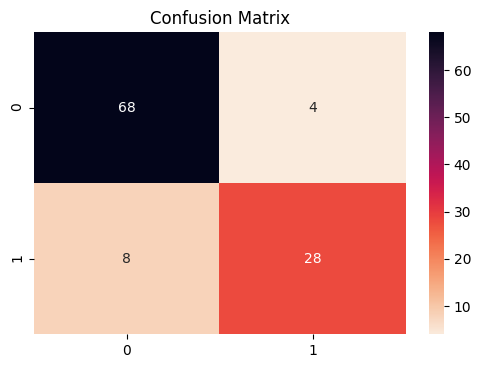

In [450]:
plt.figure(dpi = 100)
plt.title("Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(test[target]), pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

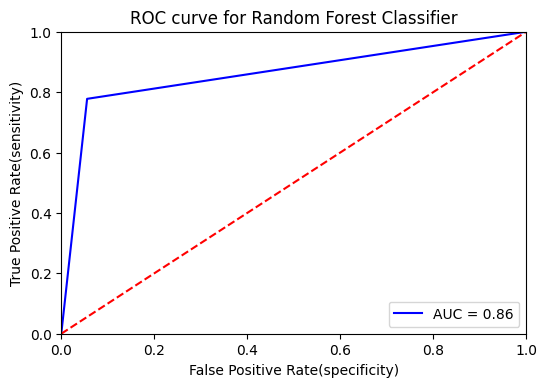

In [451]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()